### TEAM MsC Course - NTUA
### Artificial Intelligence in Healthcare
### Student Assignement
##### Academic Year 2024-25


## A. Personal Details

Student Name: Nikolaos-Andreas Tzovaras

ID: 03500077

The dataset we are going to use is available at Kaggle (Abdominal CT scans dataset). We logged in to Kaggle, go to our account, scrolled to the API section and clicked on the Expire Token button to remove previous tokens. Clicked on the Create New Token button and downloaded kaggle.json to our machine. Installed the kaggle python module.

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nickandrewtzovaras","key":"828026e58c4f233d0157b399f850bab1"}'}

Uploaded kaggle.json to this notebook. Created directory named kaggle and moved kaggle.json file there.

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

Changed the permissions of the file.

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

Downloaded the Abdominal CT scans dataset into this notebook and unzipped it.

In [5]:
!kaggle datasets download -d orvile/abdominal-ct-scans

Dataset URL: https://www.kaggle.com/datasets/orvile/abdominal-ct-scans
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/89.5M [00:00<?, ?B/s]
100% 89.5M/89.5M [00:00<00:00, 979MB/s]


In [6]:
!unzip abdominal-ct-scans.zip -d abdominal-ct-data

Archive:  abdominal-ct-scans.zip
  inflating: abdominal-ct-data/Abdominal CT scans/Abdominal CT scans/images/image_001.nii/image_001_0000.nii  
  inflating: abdominal-ct-data/Abdominal CT scans/Abdominal CT scans/images/image_002.nii/image_002_0000.nii  
  inflating: abdominal-ct-data/Abdominal CT scans/Abdominal CT scans/images/image_003.nii/image_003_0000.nii  
  inflating: abdominal-ct-data/Abdominal CT scans/Abdominal CT scans/images/image_004.nii/image_004_0000.nii  
  inflating: abdominal-ct-data/Abdominal CT scans/Abdominal CT scans/images/image_005.nii/image_005_0000.nii  
  inflating: abdominal-ct-data/Abdominal CT scans/Abdominal CT scans/images/image_006.nii/image_006_0000.nii  
  inflating: abdominal-ct-data/Abdominal CT scans/Abdominal CT scans/images/image_007.nii/image_007_0000.nii  
  inflating: abdominal-ct-data/Abdominal CT scans/Abdominal CT scans/images/image_008.nii/image_008_0000.nii  
  inflating: abdominal-ct-data/Abdominal CT scans/Abdominal CT scans/images/ima

# B. Dataset Description

As we can see from the Kaggle, this dataset contains abdominal Computed Tomography (CT) scans captured in axial sections, originally acquired to identify signs of stomach cancer. Let's dive more in the number of samples it contains, the number of features,  the number of classes, if it is balanced or not, whether it contains missing values or not.

In [7]:
import os
base_path = "abdominal-ct-data"
subdirs = os.listdir(base_path)
print(os.listdir(base_path))

['Abdominal CT scans', 'Abdominal.txt']


In [8]:
# Check inside the main folder
main_folder = os.path.join(base_path, 'Abdominal CT scans')
print(os.listdir(main_folder))


['Abdominal CT scans']


In [9]:
# One more level deeper
deep_folder = os.path.join(main_folder, 'Abdominal CT scans')
print(os.listdir(deep_folder))


['labels', 'images']


In [10]:
# List a few image files
images_folder = os.path.join(deep_folder, 'images')
print(os.listdir(images_folder)[:5])


['image_498.nii', 'image_539.nii', 'image_556.nii', 'image_237.nii', 'image_269.nii']


In [11]:
# List what is inside labels folder
labels_folder = os.path.join(deep_folder, 'labels')
print(os.listdir(labels_folder)[:5])


['label_211.nii', 'label_371.nii', 'label_520.nii', 'label_471.nii', 'label_146.nii']


In [12]:
!pip install nibabel matplotlib

In [13]:
import nibabel as nib
import numpy as np

In [14]:
# Define paths based on our previous code
base_path = "abdominal-ct-data"
main_folder = os.path.join(base_path, 'Abdominal CT scans')
deep_folder = os.path.join(main_folder, 'Abdominal CT scans')
images_folder = os.path.join(deep_folder, 'images')
labels_folder = os.path.join(deep_folder, 'labels')

# Define helper function
def collect_deep_nested_nii(root_dir):
    nii_paths = []
    for folder in sorted(os.listdir(root_dir)):
        full_folder_path = os.path.join(root_dir, folder)
        if os.path.isdir(full_folder_path):
            files_inside = os.listdir(full_folder_path)
            nii_file = [f for f in files_inside if f.endswith('.nii')]
            if nii_file:
                full_nii_path = os.path.join(full_folder_path, nii_file[0])
                nii_paths.append(full_nii_path)
    return nii_paths

# Collect image and label paths
image_files = collect_deep_nested_nii(images_folder)
label_files = collect_deep_nested_nii(labels_folder)

num_images = len(image_files)
num_labels = len(label_files)
print(f"Number of images: {num_images}")
print(f"Number of labels: {num_labels}")

Number of images: 575
Number of labels: 575


In [15]:
# Number of features (load 1 image)
sample_image_img = nib.load(image_files[0])
sample_image_array = sample_image_img.get_fdata()
num_features = sample_image_array.shape

sample_label_img = nib.load(label_files[0])
sample_label_array = sample_label_img.get_fdata()
label_shape = sample_label_array.shape

# Print both shapes
print(f"Number of features (image shape): {num_features}")
print(f"Number of features (label shape): {label_shape}")

Number of features (image shape): (512, 512, 1)
Number of features (label shape): (512, 512, 1)


In [16]:
# Number of classes (from labels)
sample_label_img = nib.load(label_files[0])
sample_label_array = sample_label_img.get_fdata()
unique_classes_sample = np.unique(sample_label_array)
num_classes = len(unique_classes_sample) - (1 if 0 in unique_classes_sample else 0)
print(f"Number of classes (excluding background): {num_classes}")

Number of classes (excluding background): 6


In [17]:
# Balance check
N = 10
global_class_counts = {}

for label_file in label_files[:N]:
    label_img = nib.load(label_file)
    label_array = nib.load(label_file).get_fdata()
    unique, counts = np.unique(label_array, return_counts=True)
    for u, c in zip(unique, counts):
        if u not in global_class_counts:
            global_class_counts[u] = c
        else:
            global_class_counts[u] += c
# Print balance info
print("\nBalance check on first", N, "labels (voxel counts per class):")
for k in sorted(global_class_counts.keys()):
    print(f"Class {int(k)}: {global_class_counts[k]} voxels")


Balance check on first 10 labels (voxel counts per class):
Class 0: 1371729 voxels
Class 1: 291452 voxels
Class 2: 279878 voxels
Class 3: 391010 voxels
Class 4: 52624 voxels
Class 5: 128458 voxels
Class 6: 106289 voxels


The dataset is imbalanced, with Class 0 (background) dominating the voxel count. This is a common pattern in segmentation tasks in healthcare.

In [18]:
# Missing values check
image_ids = {os.path.basename(os.path.dirname(f)).replace('image_', '').replace('.nii', '') for f in image_files}
label_ids = {os.path.basename(os.path.dirname(f)).replace('label_', '').replace('.nii', '') for f in label_files}
missing_labels = image_ids - label_ids
missing_images = label_ids - image_ids
num_missing_labels = len(missing_labels)
num_missing_images = len(missing_images)
print(f"Number of missing images: {num_missing_images}")
print(f"Number of missing labels: {num_missing_labels}")

Number of missing images: 0
Number of missing labels: 0


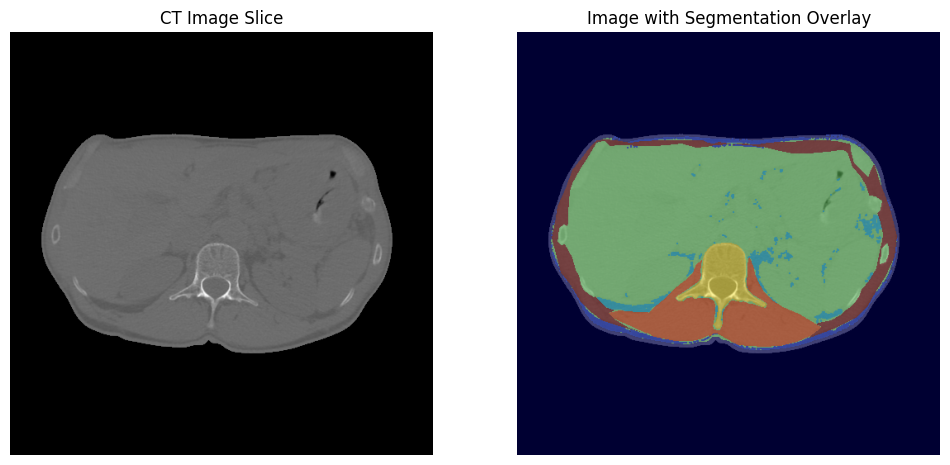

In [19]:
import random
import matplotlib.pyplot as plt

# Pick a random index
random_idx = random.randint(0, len(image_files) - 1)

# Load image and label
image_path = image_files[random_idx]
label_path = label_files[random_idx]

image_data = nib.load(image_path).get_fdata()
label_data = nib.load(label_path).get_fdata()

# Remove singleton dimension if necessary → (512, 512, 1) → (512, 512)
if image_data.shape[-1] == 1:
    image_data = image_data[:, :, 0]
if label_data.shape[-1] == 1:
    label_data = label_data[:, :, 0]

# Plot
plt.figure(figsize=(12, 6))

# Left: CT image
plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap='gray')
plt.title('CT Image Slice')
plt.axis('off')

# Right: CT image + label overlay
plt.subplot(1, 2, 2)
plt.imshow(image_data, cmap='gray')
plt.imshow(label_data, cmap='jet', alpha=0.4)  # Overlay with transparency
plt.title('Image with Segmentation Overlay')
plt.axis('off')

plt.show()


# C. Data Preprocessing

In [20]:
from skimage.transform import resize

# Resize both image and label
def resize_image_and_label(image, label, new_shape=(128, 128)):
    # Resize image → use anti-aliasing for CT
    image_resized = resize(image, new_shape, mode='constant', anti_aliasing=True)
    # Resize label → no anti-aliasing, preserve class labels
    label_resized = resize(label, new_shape, mode='constant', order=0, preserve_range=True).astype(np.uint8)
    return image_resized, label_resized


Images and labels were resized to 128x128 pixels to reduce memory usage and computational time, making training feasible within Colab resource limits.



In [21]:
# Clip to HU window [-200, 200] and normalize to [0,1]
def preprocess_image(image_data, clip_min=-200, clip_max=200):
    image_data = np.clip(image_data, clip_min, clip_max)
    image_data = (image_data - clip_min) / (clip_max - clip_min)
    return image_data

# Convert label to integer class mask
def preprocess_label(label_data):
    return label_data.astype(np.uint8)


CT images were clipped to a [-200, 200] HU window to focus on soft tissue structures and normalized to [0,1] to standardize the input range for the neural network.

In [22]:
# Load all images and labels → filter empty slices
all_images = []
all_labels = []
num_valid = 0

for img_path, lbl_path in zip(image_files, label_files):
    # Load image
    img = nib.load(img_path).get_fdata()
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    img = preprocess_image(img)

    # Load label
    lbl = nib.load(lbl_path).get_fdata()
    if lbl.shape[-1] == 1:
        lbl = lbl[:, :, 0]
    lbl = preprocess_label(lbl)

    # Filter out empty labels (only background = 0)
    if np.max(lbl) == 0:
        continue

    # Resize
    img_resized, lbl_resized = resize_image_and_label(img, lbl)

    img_resized = img_resized[..., np.newaxis]
    lbl_resized = lbl_resized[..., np.newaxis]

    # Append to lists
    all_images.append(img_resized)
    all_labels.append(lbl_resized)

    num_valid += 1

print(f"Number of valid slices after filtering: {len(all_images)}")


Number of valid slices after filtering: 575


Slices containing only background (label = 0) do not provide useful information for segmentation training and may bias the model toward predicting background. Filtering them out ensures that the model focuses on learning from relevant anatomical structures. Also, a channel dimension was added to the images and labels to match the input format expected by convolutional neural networks (128×128×1).

In [23]:
# Convert lists to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Shuffle the dataset
from sklearn.utils import shuffle
all_images, all_labels = shuffle(all_images, all_labels, random_state=42)

print("Dataset shuffled.")


Dataset shuffled.


Shuffling the dataset prevents the model from learning spurious patterns from the order of the data and helps ensure that training, validation, and test sets are representative and randomly distributed.

In [24]:
from sklearn.model_selection import train_test_split

# First split: 75% train+valid, 25% test
X_temp, X_test, y_temp, y_test = train_test_split(all_images, all_labels, test_size=0.25, random_state=42)

# Second split: 75% train, 25% valid (from train+valid)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Final print of dataset sizes
print(f"Train set: {X_train.shape} {y_train.shape}")
print(f"Validation set: {X_valid.shape} {y_valid.shape}")
print(f"Test set: {X_test.shape} {y_test.shape}")


Train set: (323, 128, 128, 1) (323, 128, 128, 1)
Validation set: (108, 128, 128, 1) (108, 128, 128, 1)
Test set: (144, 128, 128, 1) (144, 128, 128, 1)


The dataset was split into training, validation, and test subsets to enable proper model evaluation. The test set is reserved for final performance assessment, while the validation set helps tune hyperparameters during training. This ensures a fair and reliable evaluation of model generalization.

# D. Fine-tuning of a pre-trained model

In this section, we apply transfer learning by using a pre-trained MobileNetV2 encoder, originally trained on ImageNet to perform medical image segmentation on the abdominal CT scans.

In [25]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load pre-trained MobileNetV2 → no top, input 128x128x3
mobilenet_base = MobileNetV2(include_top=False, weights='imagenet', input_shape=(128,128,3))

# Freeze encoder
mobilenet_base.trainable = False

# Tap an intermediate layer → block_6_expand_relu → output shape (16,16)
encoder_output = mobilenet_base.get_layer("block_3_expand_relu").output
print("Encoder output shape:", encoder_output.shape)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Encoder output shape: (None, 32, 32, 144)


In [26]:
# Decoder
x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
x = layers.UpSampling2D((2,2))(x)

x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)

# Final output layer → (128,128,7)
outputs = layers.Conv2D(7, (1,1), activation='softmax')(x)

# Build model
model = models.Model(inputs=mobilenet_base.input, outputs=outputs)

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 261,303 (1020.71 KB)

 Trainable params: 240,263 (938.53 KB)

 Non-trainable params: 21,040 (82.19 KB)

In [27]:
# Repeat grayscale channel → 3 channels
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_valid_rgb = np.repeat(X_valid, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=7)
y_valid_cat = to_categorical(y_valid, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)


In [28]:
# Train model
history = model.fit(
    X_train_rgb, y_train_cat,
    validation_data=(X_valid_rgb, y_valid_cat),
    batch_size=16,
    epochs=20,
    verbose=1
)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 413ms/step - accuracy: 0.4964 - loss: 1.5023 - val_accuracy: 0.6778 - val_loss: 0.8819
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7122 - loss: 0.7902 - val_accuracy: 0.7544 - val_loss: 0.6549
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7716 - loss: 0.6112 - val_accuracy: 0.8000 - val_loss: 0.5281
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8154 - loss: 0.4912 - val_accuracy: 0.8267 - val_loss: 0.4595
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8318 - loss: 0.4445 - val_accuracy: 0.8377 - val_loss: 0.4309
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8416 - loss: 0.4170 - val_accuracy: 0.8474 - val_loss: 0.3961
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8504 - loss: 0.3903 - val_accuracy: 0.8553 - val_loss: 0.3799
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8603 - loss: 0.3672 - val_accuracy: 0.8626 -

In [29]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_rgb, y_test_cat, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8928 - loss: 0.2811
Test Loss: 0.2805
Test Accuracy: 0.8928


In [30]:
# Dice score function (single class)
def dice_score(y_true, y_pred, smooth=1e-6):
    intersection = np.sum(y_true * y_pred)
    sum_true_pred = np.sum(y_true) + np.sum(y_pred)
    dice = (2. * intersection + smooth) / (sum_true_pred + smooth)
    return dice


In [31]:
# Predict on test set
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=-1)
y_true_labels = np.argmax(y_test_cat, axis=-1)

# Number of classes
num_classes = 7

# Compute Dice score for each class
for c in range(num_classes):
    print(f"Class {c}: ", end='')

    y_true_c = (y_true_labels == c).astype(np.uint8)
    y_pred_c = (y_pred_labels == c).astype(np.uint8)

    dice = dice_score(y_true_c, y_pred_c)
    print(f"Dice score = {dice:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 501ms/step
Class 0: Dice score = 0.9881
Class 1: Dice score = 0.8528
Class 2: Dice score = 0.7472
Class 3: Dice score = 0.7574
Class 4: Dice score = 0.7293
Class 5: Dice score = 0.7383
Class 6: Dice score = 0.7226


The fine-tuned MobileNetV2 model achieved strong performance, with high test accuracy and competitive Dice scores across most classes. Its pre-trained encoder allows it to learn effective representations even on this relatively small dataset, especially benefiting the segmentation of smaller or less represented structures.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


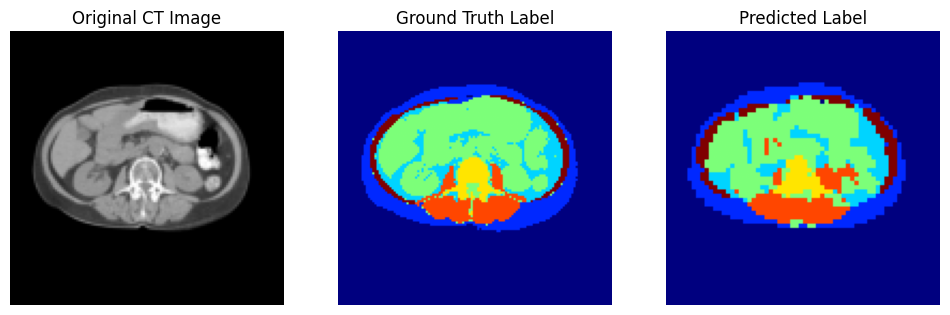

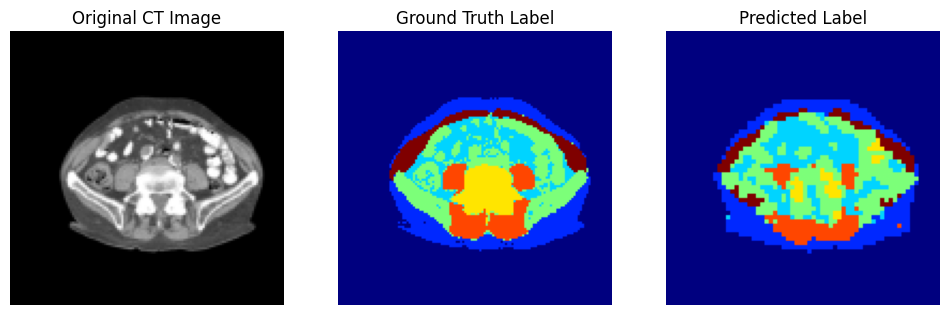

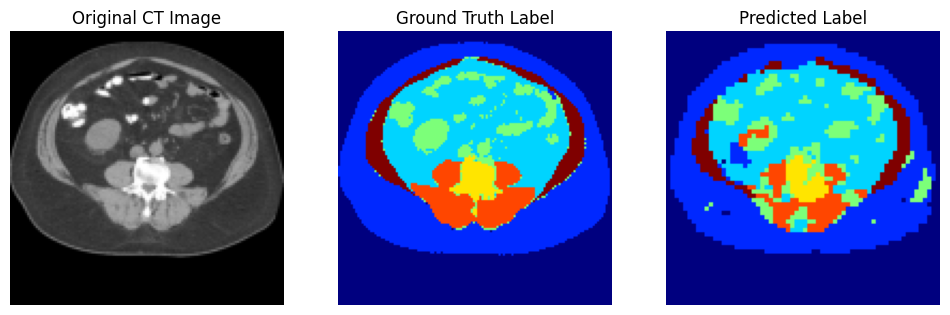

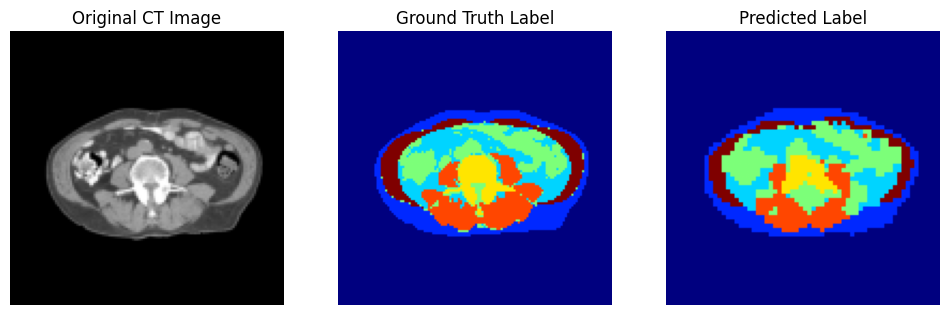

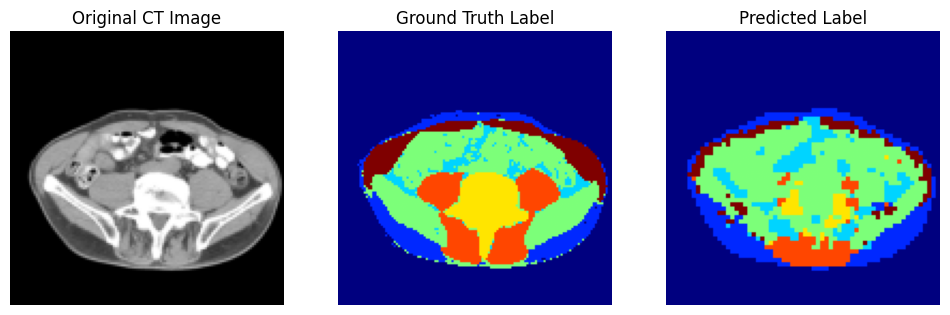

In [32]:

# Pick N random test samples
N = 5
indices = random.sample(range(X_test_rgb.shape[0]), N)

# Predict on test set
y_pred = model.predict(X_test_rgb)

# Plot N samples
for i, idx in enumerate(indices):
    image = X_test_rgb[idx]
    true_mask = np.argmax(y_test_cat[idx], axis=-1)
    pred_mask = np.argmax(y_pred[idx], axis=-1)

    # Plot
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.title("Original CT Image")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(true_mask, cmap='jet', vmin=0, vmax=6)
    plt.title("Ground Truth Label")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(pred_mask, cmap='jet', vmin=0, vmax=6)
    plt.title("Predicted Label")
    plt.axis('off')

    plt.show()


Visual inspection of the segmentation masks shows that MobileNetV2 produces accurate and sharp segmentations for major organs. Some minor errors appear in smaller or low-contrast structures, as expected given the class imbalance.

# E. Design my own model from scratch

We design and train a U-Net model from scratch, without using any pre-trained components. The goal is to assess how much segmentation performance can be achieved by the U-Net architecture alone.

In [33]:
def unet_model(input_shape=(128,128,1), num_classes=7):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2,2))(c1)

    c2 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2,2))(c2)

    c3 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2,2))(c3)

    # Bottleneck
    b = layers.Conv2D(256, (3,3), activation='relu', padding='same')(p3)
    b = layers.Conv2D(256, (3,3), activation='relu', padding='same')(b)

    # Decoder
    u3 = layers.UpSampling2D((2,2))(b)
    u3 = layers.Concatenate()([u3, c3])
    c6 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(u3)
    c6 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(c6)

    u2 = layers.UpSampling2D((2,2))(c6)
    u2 = layers.Concatenate()([u2, c2])
    c7 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(u2)
    c7 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(c7)

    u1 = layers.UpSampling2D((2,2))(c7)
    u1 = layers.Concatenate()([u1, c1])
    c8 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(u1)
    c8 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(c8)

    # Output layer
    outputs = layers.Conv2D(num_classes, (1,1), activation='softmax')(c8)

    # Build model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model


In [34]:
unet = unet_model()

unet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

unet.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │        320 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │      9,248 │ conv2d_3[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │     36,928 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 32,    │    147,584 │ conv2d_7[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │    590,080 │ conv2d_9[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_2     │ (None, 32, 32,    │          0 │ conv2d_10[0][0]   │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ up_sampling2d_2[… │
│ (Concatenate)       │ 384)              │            │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 32, 32,    │    442,496 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │    147,584 │ conv2d_11[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_3     │ (None, 64, 64,    │          0 │ conv2d_12[0][0] 

 Total params: 1,946,503 (7.43 MB)

 Trainable params: 1,946,503 (7.43 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history_unet = unet.fit(
    X_train, y_train_cat,
    validation_data=(X_valid, y_valid_cat),
    batch_size=16,
    epochs=20,
    verbose=1
)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 649ms/step - accuracy: 0.4809 - loss: 1.9337 - val_accuracy: 0.5459 - val_loss: 1.7984
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5549 - loss: 1.5829 - val_accuracy: 0.6760 - val_loss: 0.9542
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7006 - loss: 0.8428 - val_accuracy: 0.7443 - val_loss: 0.6295
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7662 - loss: 0.5763 - val_accuracy: 0.7659 - val_loss: 0.6455
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7710 - loss: 0.5759 - val_accuracy: 0.7850 - val_loss: 0.5133
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7981 - loss: 0.5013 - val_accuracy: 0.8215 - val_loss: 0.4781
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8139 - loss: 0.4749 - val_accuracy: 0.8246 - val_loss: 0.4556
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8215 - loss: 0.4487 - val_accuracy: 0.8190 -

In [36]:
# Evaluate on test set
test_loss_unet, test_acc_unet = unet.evaluate(X_test, y_test_cat)
print(f"U-Net Test Loss: {test_loss_unet:.4f}")
print(f"U-Net Test Accuracy: {test_acc_unet:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8788 - loss: 0.3161
U-Net Test Loss: 0.3123
U-Net Test Accuracy: 0.8792


In [37]:
# Predict on test set with U-Net
y_pred_unet = unet.predict(X_test)
y_pred_unet_labels = np.argmax(y_pred_unet, axis=-1)
y_true_labels_unet = np.argmax(y_test_cat, axis=-1)

# Number of classes
num_classes = 7

# Compute Dice score for each class
for c in range(num_classes):
    print(f"Class {c}: ", end='')

    y_true_c = (y_true_labels_unet == c).astype(np.uint8)
    y_pred_c = (y_pred_unet_labels == c).astype(np.uint8)

    dice = dice_score(y_true_c, y_pred_c)
    print(f"Dice score = {dice:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step
Class 0: Dice score = 0.9896
Class 1: Dice score = 0.8492
Class 2: Dice score = 0.6987
Class 3: Dice score = 0.7168
Class 4: Dice score = 0.7689
Class 5: Dice score = 0.7469
Class 6: Dice score = 0.6031


The U-Net model trained from scratch also achieved strong results, with slightly lower overall accuracy and Dice scores compared to MobileNetV2. This is expected, as the U-Net lacks a pre-trained encoder and must learn all feature representations from scratch. Nonetheless, its performance demonstrates the effectiveness of the U-Net architecture for medical image segmentation.

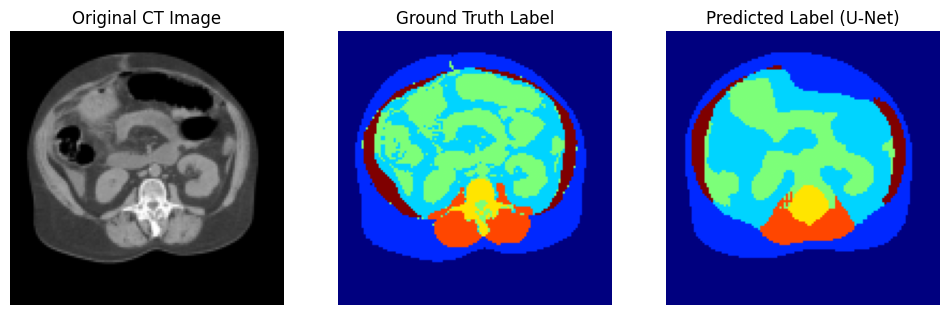

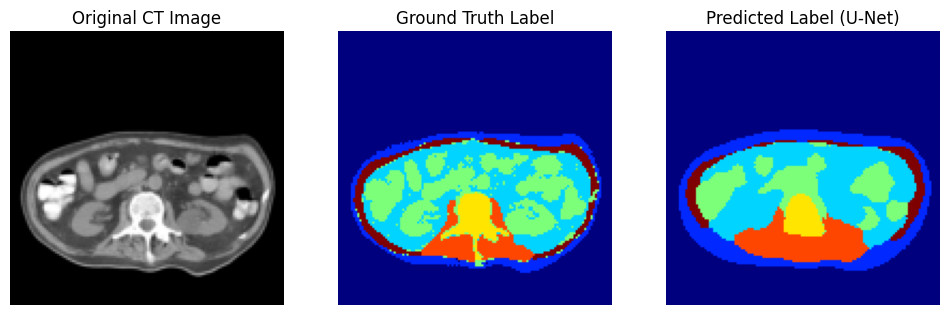

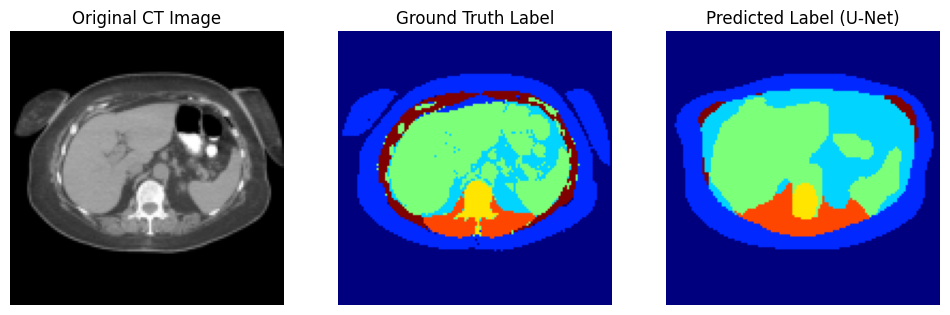

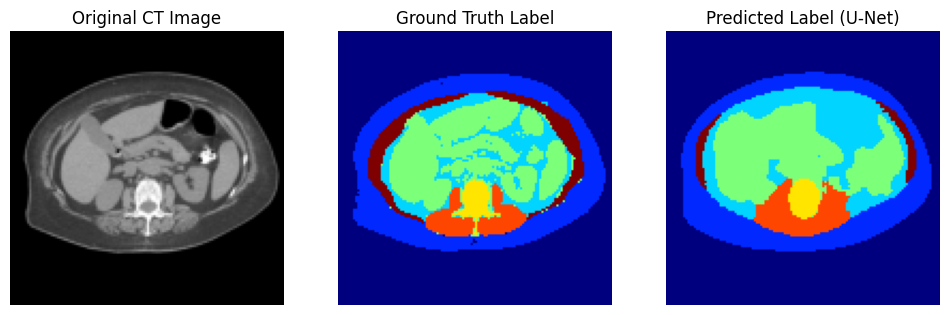

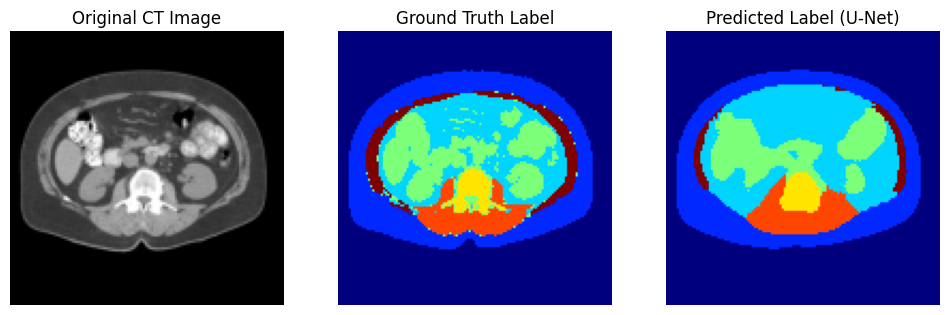

In [38]:
# Pick N random test samples
N = 5
indices = random.sample(range(X_test.shape[0]), N)

# Plot N samples
for i, idx in enumerate(indices):
    image = X_test[idx]
    true_mask = np.argmax(y_test_cat[idx], axis=-1)  # Convert one-hot to label
    pred_mask = np.argmax(y_pred_unet[idx], axis=-1) # Convert softmax to label

    # Plot
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.title("Original CT Image")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(true_mask, cmap='jet', vmin=0, vmax=6)
    plt.title("Ground Truth Label")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(pred_mask, cmap='jet', vmin=0, vmax=6)
    plt.title("Predicted Label (U-Net)")
    plt.axis('off')

    plt.show()


The U-Net model successfully segments major structures in most cases. In some samples, it shows minor weaknesses in segmenting small or ambiguous structures, reflecting its lower Dice scores for certain classes.

# F. Explainability

We perform an explainability study by analyzing the predictions of both models on selected test samples. We compute Dice scores per sample and visualize both success cases and failure cases on the same samples for both models. This provides insights into the strengths and limitations of each model beyond the quantitative metrics.

In [43]:
# Section D → MobileNetV2 → results
test_acc_mobilenet = 0.8928
test_loss_mobilenet = 0.2805

# Section E → U-Net → results
test_acc_unet = test_acc_unet
test_loss_unet = test_loss_unet

print("=== Test Accuracy & Loss Comparison ===")
print(f"MobileNetV2 → Accuracy: {test_acc_mobilenet:.4f}, Loss: {test_loss_mobilenet:.4f}")
print(f"U-Net        → Accuracy: {test_acc_unet:.4f}, Loss: {test_loss_unet:.4f}")


=== Test Accuracy & Loss Comparison ===
MobileNetV2 → Accuracy: 0.8928, Loss: 0.2805
U-Net        → Accuracy: 0.8792, Loss: 0.3123


In [44]:
dice_mobilenet = [0.9881, 0.8528, 0.7472, 0.7574, 0.7293, 0.7383, 0.7226]
dice_unet = [0.9896, 0.8492, 0.6987, 0.7168, 0.7689, 0.7469, 0.6031]

print("\n=== Dice Score Comparison (per class) ===")
print(f"{'Class':<8} {'MobileNetV2':<15} {'U-Net':<15}")
print("-" * 40)
for i in range(7):
    print(f"{i:<8} {dice_mobilenet[i]:<15.4f} {dice_unet[i]:<15.4f}")



=== Dice Score Comparison (per class) ===
Class    MobileNetV2     U-Net          
----------------------------------------
0        0.9881          0.9896         
1        0.8528          0.8492         
2        0.7472          0.6987         
3        0.7574          0.7168         
4        0.7293          0.7689         
5        0.7383          0.7469         
6        0.7226          0.6031         


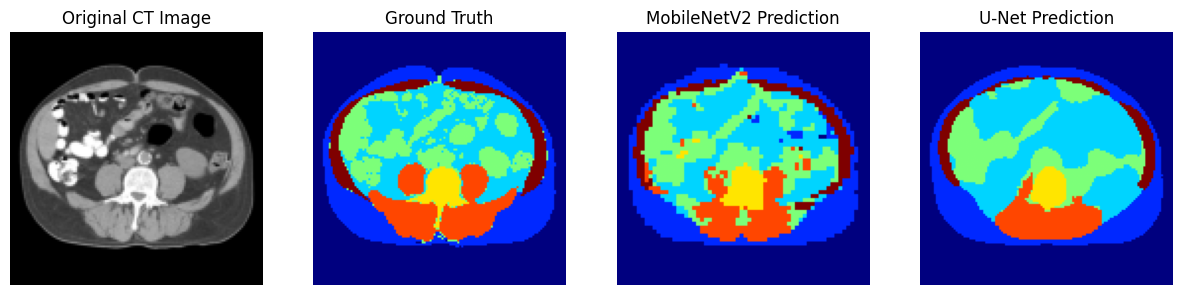

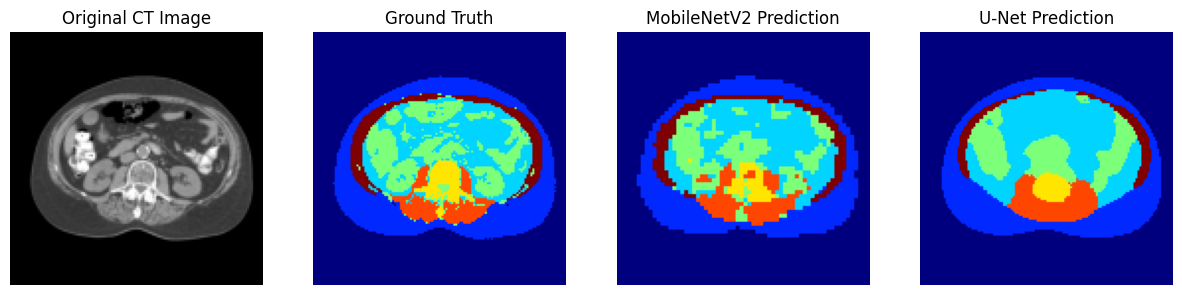

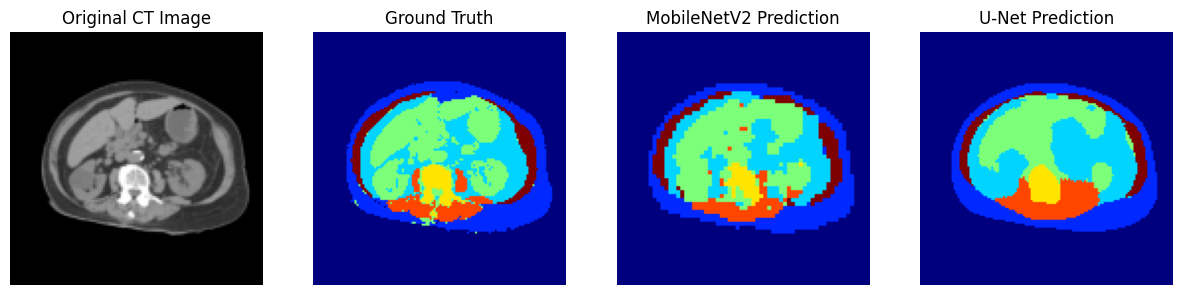

In [45]:
# Visualize 3 random test images → both models

N = 3
indices = random.sample(range(X_test.shape[0]), N)

for i, idx in enumerate(indices):
    image = X_test[idx]
    true_mask = np.argmax(y_test_cat[idx], axis=-1)

    # MobileNetV2 prediction
    y_pred_mobilenet_labels = np.argmax(y_pred, axis=-1)  # Section D → y_pred
    pred_mask_mobilenet = y_pred_mobilenet_labels[idx]

    # U-Net prediction
    y_pred_unet_labels = np.argmax(y_pred_unet, axis=-1)
    pred_mask_unet = y_pred_unet_labels[idx]

    # Plot
    plt.figure(figsize=(15,4))

    plt.subplot(1,4,1)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.title("Original CT Image")
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(true_mask, cmap='jet', vmin=0, vmax=6)
    plt.title("Ground Truth")
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(pred_mask_mobilenet, cmap='jet', vmin=0, vmax=6)
    plt.title("MobileNetV2 Prediction")
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(pred_mask_unet, cmap='jet', vmin=0, vmax=6)
    plt.title("U-Net Prediction")
    plt.axis('off')

    plt.show()


=== Success Cases → Same Samples for Both Models ===


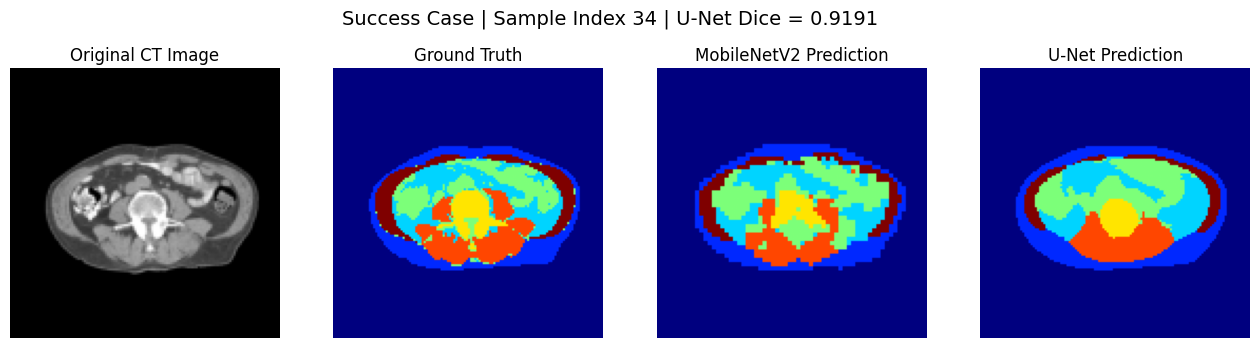

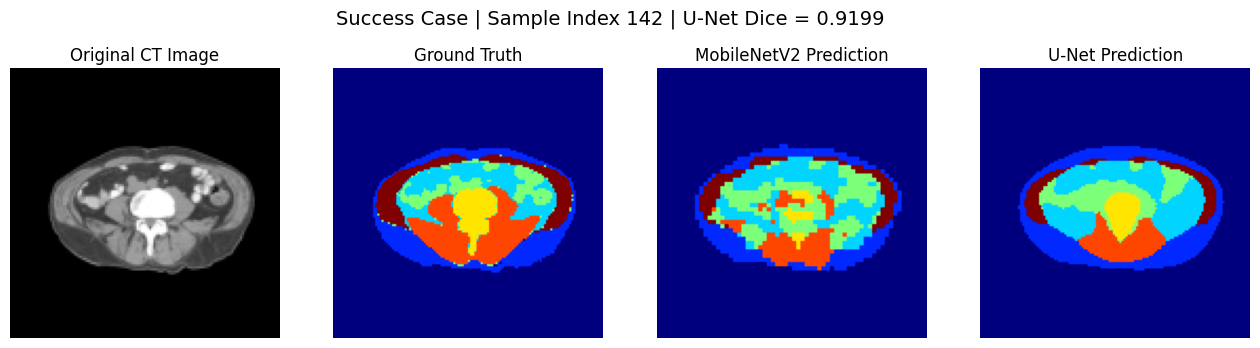

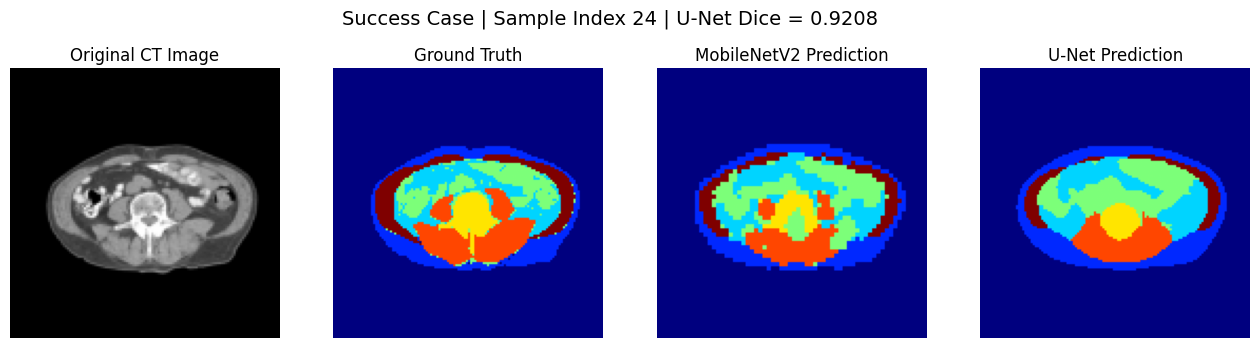

=== Failure Cases → Same Samples for Both Models ===


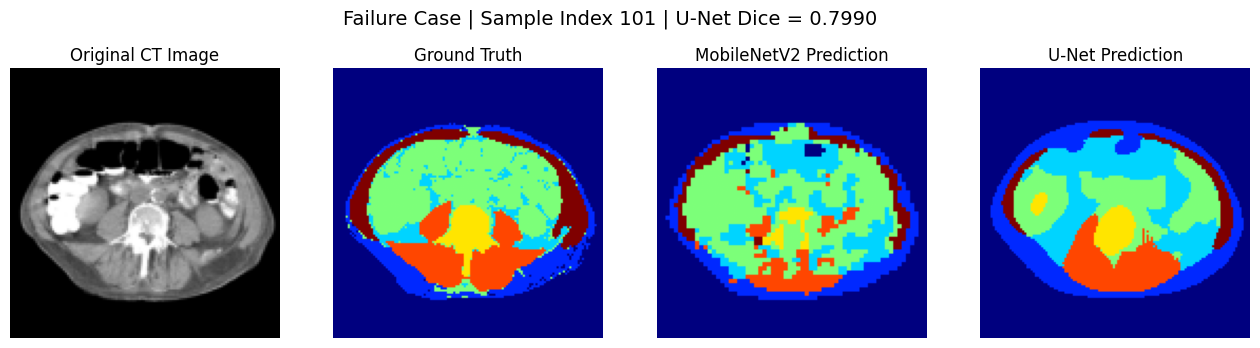

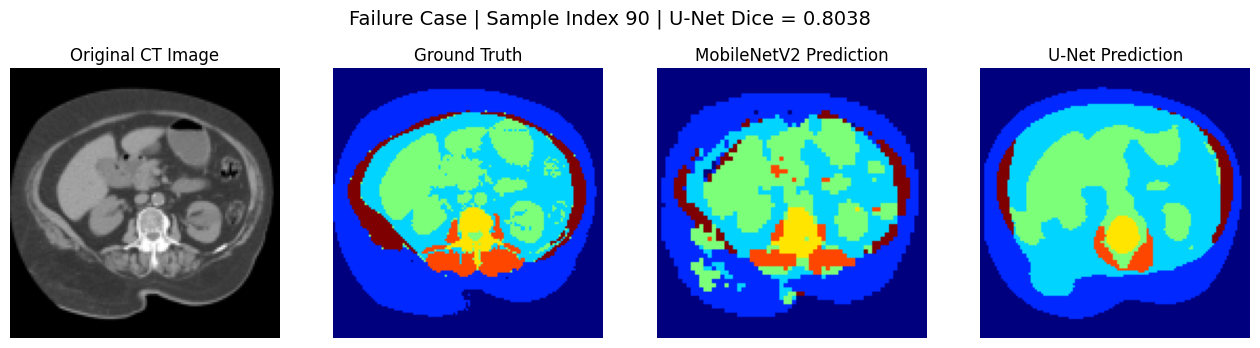

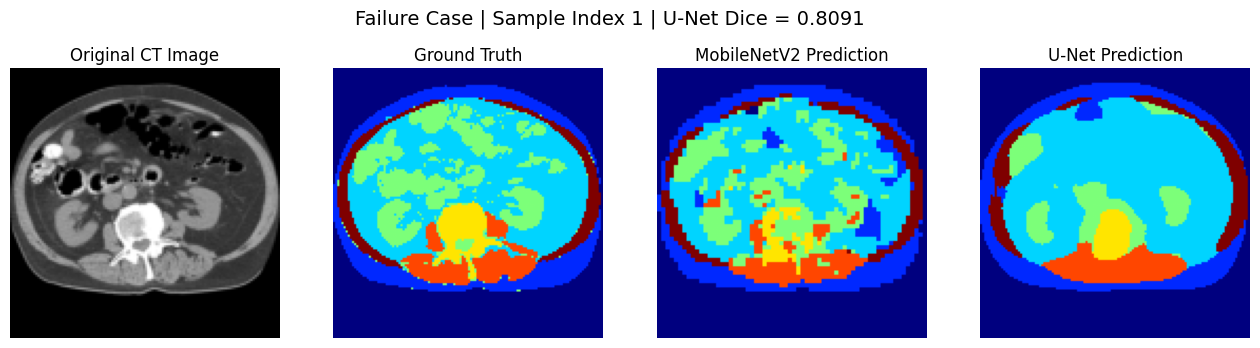

In [46]:
# Prepare ground truth labels
y_true_labels = np.argmax(y_test_cat, axis=-1)

# Prepare predicted labels
y_pred_labels_mobilenet = np.argmax(y_pred, axis=-1)
y_pred_labels_unet = np.argmax(y_pred_unet, axis=-1)

# Function to compute Dice per sample
def compute_dice_per_sample(y_true_labels, y_pred_labels):
    dice_per_sample = []
    for i in range(y_true_labels.shape[0]):
        y_true_sample = y_true_labels[i]
        y_pred_sample = y_pred_labels[i]

        intersection = np.sum(y_true_sample == y_pred_sample)
        total = y_true_sample.size
        dice = (2. * intersection) / (total + total)
        dice_per_sample.append(dice)
    return np.array(dice_per_sample)

# Compute Dice per sample → using U-Net (as "reference")
dice_per_sample_unet = compute_dice_per_sample(y_true_labels, y_pred_labels_unet)

# Sort indices → from lowest Dice to highest Dice
sorted_indices = np.argsort(dice_per_sample_unet)

# Select N samples
N_success = 3
N_failure = 3

success_indices = sorted_indices[-N_success:]
failure_indices = sorted_indices[:N_failure]

# Visualization function → for both models on same sample
def visualize_comparison(indices, title_prefix):
    for idx in indices:
        image = X_test[idx]
        true_mask = y_true_labels[idx]

        pred_mask_mobilenet = y_pred_labels_mobilenet[idx]
        pred_mask_unet = y_pred_labels_unet[idx]

        plt.figure(figsize=(16,4))

        plt.subplot(1,4,1)
        plt.imshow(image[:,:,0], cmap='gray')
        plt.title("Original CT Image")
        plt.axis('off')

        plt.subplot(1,4,2)
        plt.imshow(true_mask, cmap='jet', vmin=0, vmax=6)
        plt.title("Ground Truth")
        plt.axis('off')

        plt.subplot(1,4,3)
        plt.imshow(pred_mask_mobilenet, cmap='jet', vmin=0, vmax=6)
        plt.title("MobileNetV2 Prediction")
        plt.axis('off')

        plt.subplot(1,4,4)
        plt.imshow(pred_mask_unet, cmap='jet', vmin=0, vmax=6)
        plt.title("U-Net Prediction")
        plt.axis('off')

        plt.suptitle(f"{title_prefix} | Sample Index {idx} | U-Net Dice = {dice_per_sample_unet[idx]:.4f}", fontsize=14)
        plt.show()

print("=== Success Cases → Same Samples for Both Models ===")
visualize_comparison(success_indices, "Success Case")

print("=== Failure Cases → Same Samples for Both Models ===")
visualize_comparison(failure_indices, "Failure Case")


The explainability analysis revealed that both models can achieve accurate segmentation on well-defined structures, with MobileNetV2 showing slightly sharper boundaries in some cases. In more challenging samples, particularly those with small or low-contrast regions, both models exhibited limitations, although the pre-trained MobileNetV2 occasionally maintained better performance. These visual findings align well with the quantitative metrics and provide a deeper understanding of the practical behavior of each model on this medical imaging task.